In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat



In [39]:
df, meta = pyreadstat.read_dta('/Users/DeonaJulary/Desktop/pirus_v5.dta')

cols_to_clean = [
    'internet_radicalization', 'media_radicalization', 'social_media', 'social_media_frequency',
    'social_media_platform1', 'social_media_platform2', 'social_media_platform3',
    'social_media_platform4', 'social_media_platform5',
    'social_media_activities1', 'social_media_activities2', 'social_media_activities3',
    'social_media_activities4', 'social_media_activities5', 'social_media_activities6',
    'social_media_activities7'
]



In [40]:
# Replace -99 and -88 with NaN
df[cols_to_clean] = df[cols_to_clean].replace([-99, -88], pd.NA)

for col in cols_to_clean:
    unique_vals = df[col].dropna().unique().tolist()
    print(f"\nUnique values in '{col}':")
    print(unique_vals)




Unique values in 'internet_radicalization':
[0, 1, 2]

Unique values in 'media_radicalization':
[0, 1, 2]

Unique values in 'social_media':
[0, 1, 2]

Unique values in 'social_media_frequency':
[4, 3, 2, 5, 1]

Unique values in 'social_media_platform1':
[1, 3, 13, 26, 2, 12, 27, 5, 28, 29, 19, 21, 18, 11, 15, 31, 9, 30, 33, 4, 32, 17]

Unique values in 'social_media_platform2':
[14, 27, 2, 3, 28, 5, 1, 17, 26, 21, 13, 12, 30, 11, 20, 16, 7, 22, 10, 29, 25, 31, 33, 24, 9, 19, 32, 15]

Unique values in 'social_media_platform3':
[27, 3, 1, 12, 5, 19, 28, 26, 29, 13, 11, 7, 10, 16, 17, 15, 22, 2, 30, 25, 33, 14, 32, 9]

Unique values in 'social_media_platform4':
[26, 5, 27, 12, 30, 25, 9, 10, 20, 21, 28, 18, 4, 15, 16, 1, 29, 33, 19, 17, 14, 32, 31]

Unique values in 'social_media_platform5':
[15, 27, 16, 19, 10, 26, 30, 29, 32, 28, 25, 33]

Unique values in 'social_media_activities1':
[1, 2, 3, 4, 7, 5, 6]

Unique values in 'social_media_activities2':
[2, 3, 4, 5, 7, 6]

Unique values in

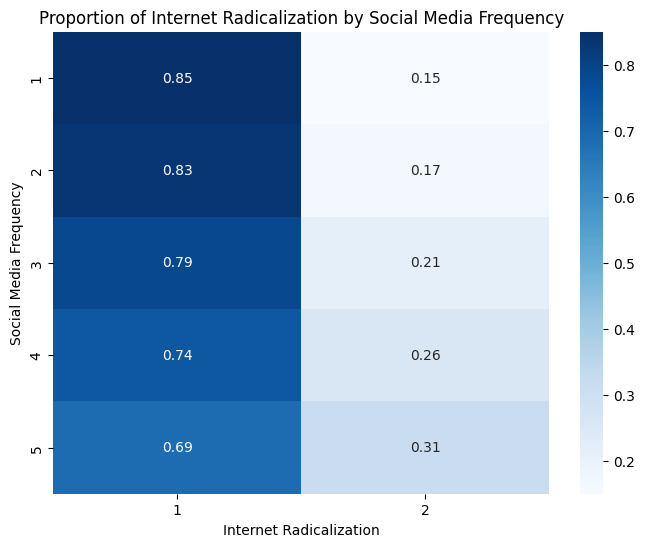

In [41]:
ct = pd.crosstab(df['social_media_frequency'], df['internet_radicalization'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proportion of Internet Radicalization by Social Media Frequency')
plt.xlabel('Internet Radicalization')
plt.ylabel('Social Media Frequency')
plt.show()

In [42]:
platform_map = {
    1: 'Facebook',
    2: 'Twitter',
    3: 'YouTube',
    4: 'Vimeo',
    5: 'Instagram',
    6: 'Flickr',
    7: 'Tumblr',
    8: 'Imgur',
    9: 'Snapchat',
    10: 'Google Plus',
    11: 'Skype',
    12: 'LinkedIn',
    13: 'MySpace',
    14: '4chan',
    15: 'Reddit',
    16: 'Ask.fm',
    17: 'WhatsApp',
    18: 'Surespot',
    19: 'Telegram',
    20: 'Kik',
    21: 'Paltalk',
    22: 'VK',
    23: 'Diaspora',
    24: 'JustPaste.it',
    25: 'SoundCloud',
    26: 'Personal blogging websites',
    27: 'Other non-encrypted software',
    28: 'Other encrypted software',
    29: 'Discord',
    30: 'Gab',
    31: 'Iron March',
    32: 'Parler',
    33: 'Wire'
}


In [45]:
platform_cols = [
    'social_media_platform1', 'social_media_platform2', 'social_media_platform3',
    'social_media_platform4', 'social_media_platform5'
]

# Melt into long format BEFORE mapping
df_long = df.melt(value_vars=platform_cols, value_name='platform_code', var_name='platform_slot')
df_long = df_long.dropna(subset=['platform_code'])

# Convert codes to int
df_long['platform_code'] = df_long['platform_code'].astype(int)

# Map to platform names
df_long['platform_name'] = df_long['platform_code'].map(platform_map)

# Drop rows with no valid mapping (if any)
df_long = df_long.dropna(subset=['platform_name'])

# Count platforms
platform_counts = df_long['platform_name'].value_counts()


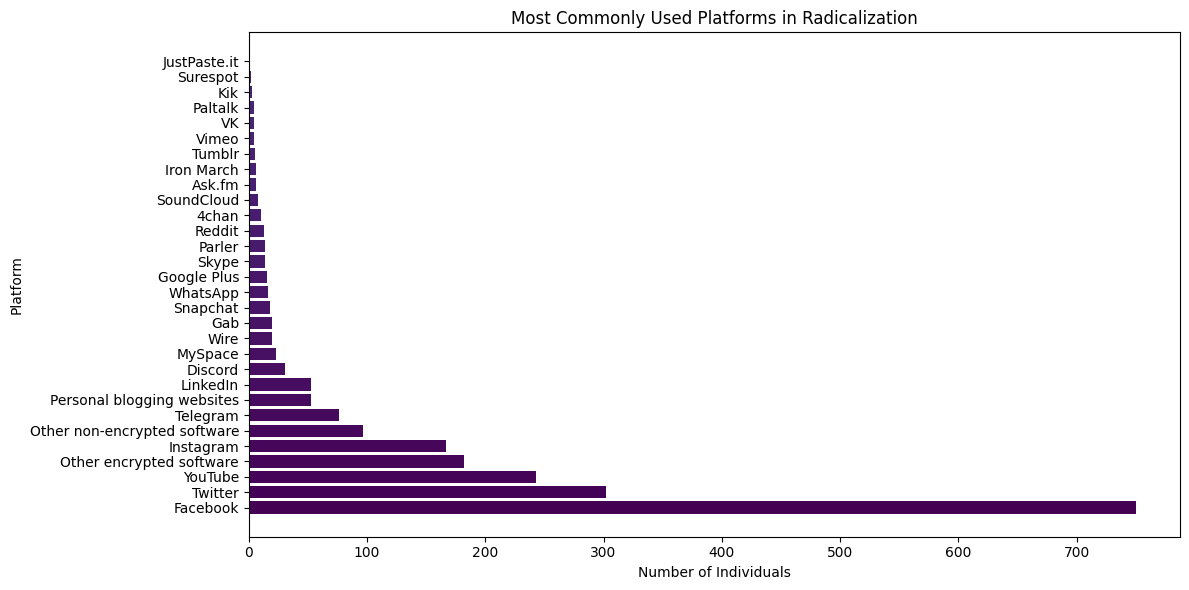

In [47]:
# Plot
plt.figure(figsize=(12,6))
plt.barh(platform_counts.index, platform_counts.values, color=plt.cm.viridis(range(len(platform_counts))))
plt.title('Most Commonly Used Platforms in Radicalization')
plt.xlabel('Number of Individuals')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()





In [49]:
# Map activity codes to Passive or Active based on definitions
activity_map = {
    1: 'Passive',  # Consuming content (passive)
    2: 'Active',   # Disseminating content
    3: 'Active',   # Participating in extremist dialogue
    4: 'Active',   # Creating propaganda/content
    5: 'Active',   # Communicating with extremist group members (info)
    6: 'Active',   # Communicating for foreign travel facilitation
    7: 'Active'    # Communicating for domestic attack facilitation
}

activity_cols = [
    'social_media_activities1', 'social_media_activities2', 'social_media_activities3',
    'social_media_activities4', 'social_media_activities5', 'social_media_activities6',
    'social_media_activities7'
]

# Melt data to have one row per activity per individual
df_activities = df.melt(value_vars=activity_cols, value_name='activity_code')

# Remove missing values (if any)
df_activities = df_activities.dropna(subset=['activity_code'])

# Convert activity codes to int (if needed)
df_activities['activity_code'] = df_activities['activity_code'].astype(int)

# Map activity codes to activity type
df_activities['activity_type'] = df_activities['activity_code'].map(activity_map)


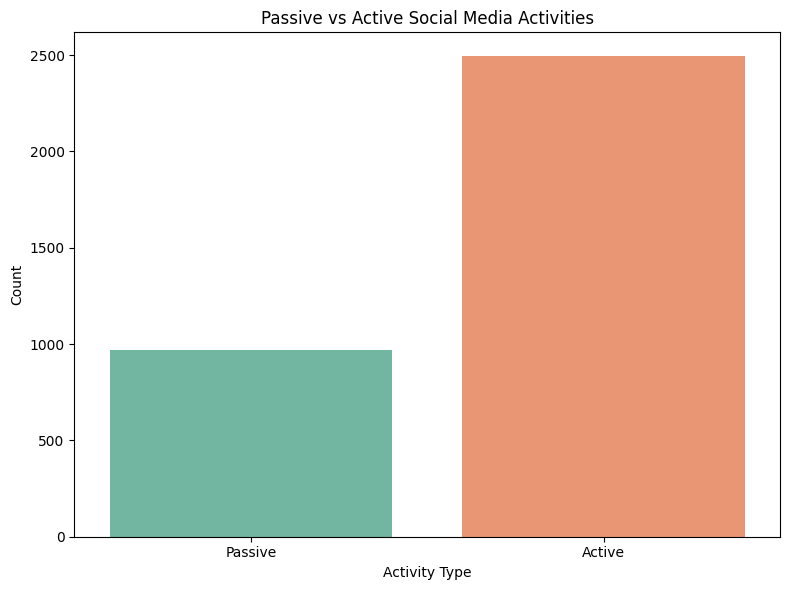

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_activities, x='activity_type', hue='activity_type', palette='Set2', legend=False)
plt.title('Passive vs Active Social Media Activities')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

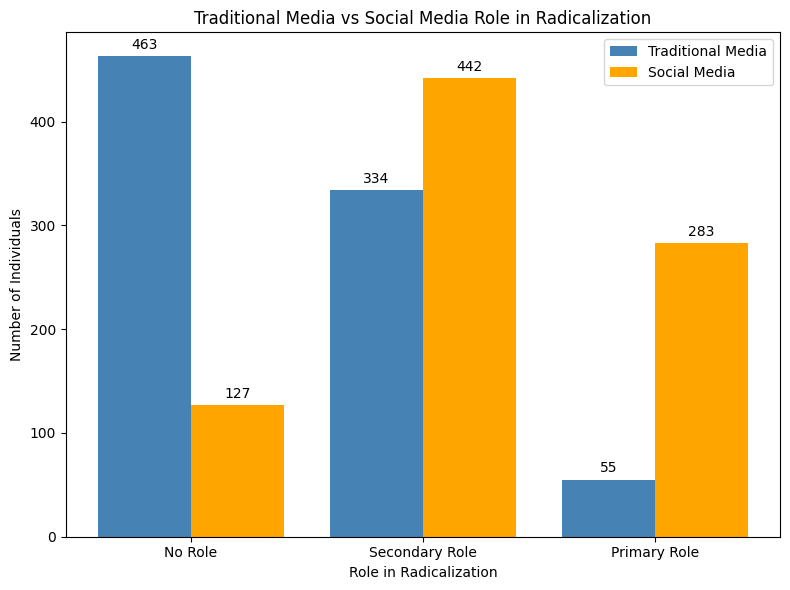

In [58]:
# Map codes to labels
role_labels = ['No Role', 'Secondary Role', 'Primary Role']

# Count occurrences for traditional media radicalization
trad_counts = df_compare['media_radicalization'].value_counts().reindex([0,1,2], fill_value=0)

# Count occurrences for social media radicalization
social_counts = df_compare['social_media'].value_counts().reindex([0,1,2], fill_value=0)

# Bar width and positions
bar_width = 0.4
x_positions = range(len(role_labels))

fig, ax = plt.subplots(figsize=(8,6))

# Bars for Traditional Media
bars1 = ax.bar(
    [x - bar_width/2 for x in x_positions], 
    trad_counts, 
    width=bar_width, 
    label='Traditional Media', 
    color='steelblue'
)

# Bars for Social Media
bars2 = ax.bar(
    [x + bar_width/2 for x in x_positions], 
    social_counts, 
    width=bar_width, 
    label='Social Media', 
    color='orange'
)

# Set labels and title
ax.set_xlabel('Role in Radicalization')
ax.set_ylabel('Number of Individuals')
ax.set_title('Traditional Media vs Social Media Role in Radicalization')
ax.set_xticks(x_positions)
ax.set_xticklabels(role_labels)
ax.legend()

# Add data labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0,3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


In [60]:
import os

# This creates the folder (and parent folders if needed) if it doesn't exist already
os.makedirs('../visuals/charts', exist_ok=True)

# Now save your figure
plt.savefig('../visuals/charts/plot_name.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [62]:
# Assuming your cleaned DataFrame is called `data_clean` or similar
df.to_csv('../data/pirus_clean.csv', index=False)
